In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime as dt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
def parser(s):
    return dt.strptime(s, '%Y%m%d')

In [3]:
df_13= pd.read_csv(r"D:\Datasets\trading dataset\nifty2_2013.txt", names= ['Symbol', 'Y-M-D', 'Time', 'Open', 'High', 'Low', 'Close'], parse_dates=[1], index_col= False, date_parser= parser)

In [4]:
# first let's rename the Y-M-D column to Date set date column as index

df_13.rename(columns={'Y-M-D': 'Date'}, inplace= True)
df_13.set_index('Date', inplace= True)

In [5]:
df_13.head()

,Symbol,Time,Open,High,Low,Close
Date,,,,,,
2013-06-03,NIFTY,09:16,6005.90,6011.00,5985.00,5985.65
2013-06-03,NIFTY,09:17,5985.45,5988.40,5978.75,5981.40
2013-06-03,NIFTY,09:18,5980.90,5985.25,5980.60,5984.90
2013-06-03,NIFTY,09:19,5985.25,5992.50,5984.60,5992.50
2013-06-03,NIFTY,09:20,5992.75,5998.40,5992.40,5997.60


In [6]:
# Now we are just intrested in two columns, i.e Y-M-D and close. So,lets drop the column which are not of our interest
df_13_copy= df_13.copy()
df_13_copy.drop(['Symbol', 'Open', 'High', 'Low'], inplace= True, axis= 1)

In [7]:
df_13_copy.head()

,Time,Close
Date,,
2013-06-03,09:16,5985.65
2013-06-03,09:17,5981.40
2013-06-03,09:18,5984.90
2013-06-03,09:19,5992.50
2013-06-03,09:20,5997.60


In [8]:
# check null 
df_13_copy.isnull().sum()

Time     0
Close    0
dtype: int64

In [9]:
# check the type of columns
df_13_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53922 entries, 2013-06-03 to 2013-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    53922 non-null  object 
 1   Close   53922 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [10]:
# plot the series 
def plot_series(series):
    
    # Plot the time series data
    plt.figure(figsize=(10, 6))
    plt.plot(series , color='red')

    # Add vertical lines at the start of each month
    for month in df_13_copy.index:
        if month.month == 1:  # Adjust this condition as needed (e.g., to plot lines at the start of every quarter)
            plt.axvline(x=month, color='gray', linestyle='--', linewidth=1)

    # Customize the plot
    plt.title('Time Series Plot with Vertical Lines at Start of Each Month')
    plt.xlabel('Date')
    plt.ylabel('Close Value')
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

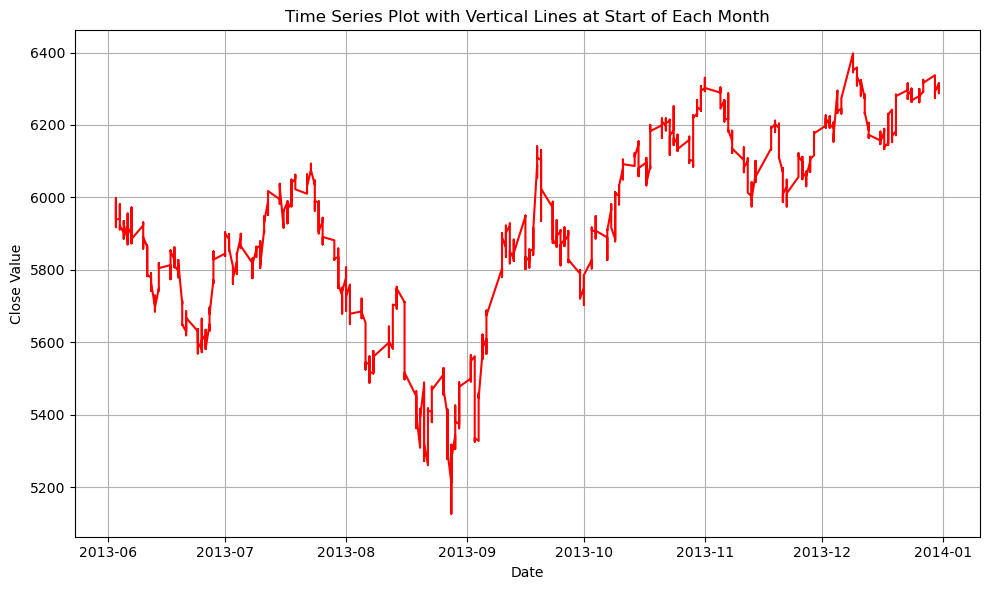

In [11]:
plot_series(df_13_copy['Close'])

## # Normalize the data

In [12]:

avg, std= df_13_copy.Close.mean(), df_13_copy.Close.std()

In [13]:
Norm_Close= (df_13_copy.Close - avg) / std

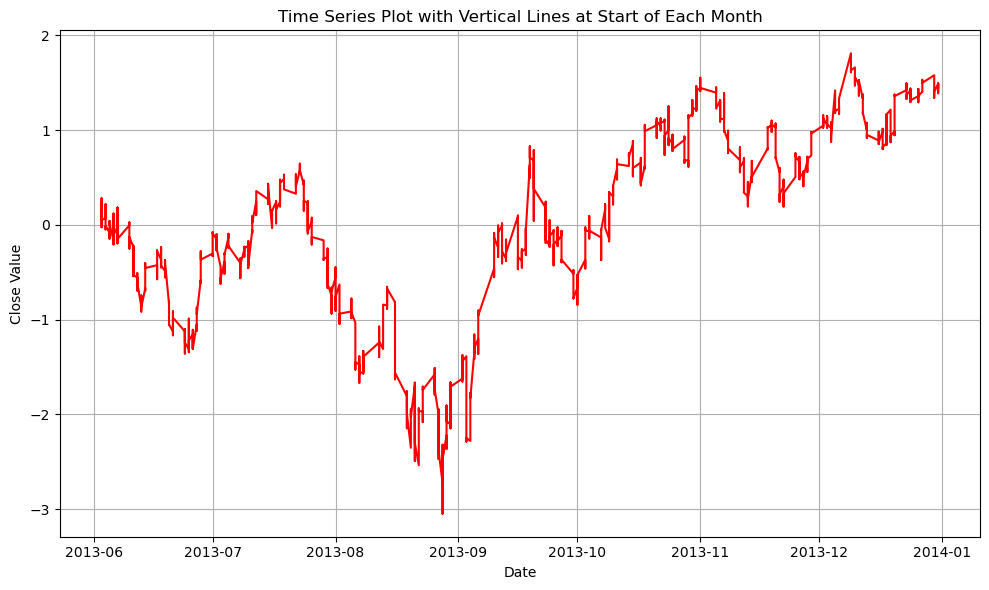

In [14]:
plot_series(Norm_Close)
# plt.axhline(0, linestyle= '--', color= 'blue', alpha= 0.5)

## Remove the Trend by Taking First Difference

In [15]:
Norm_Close= Norm_Close.diff().dropna()

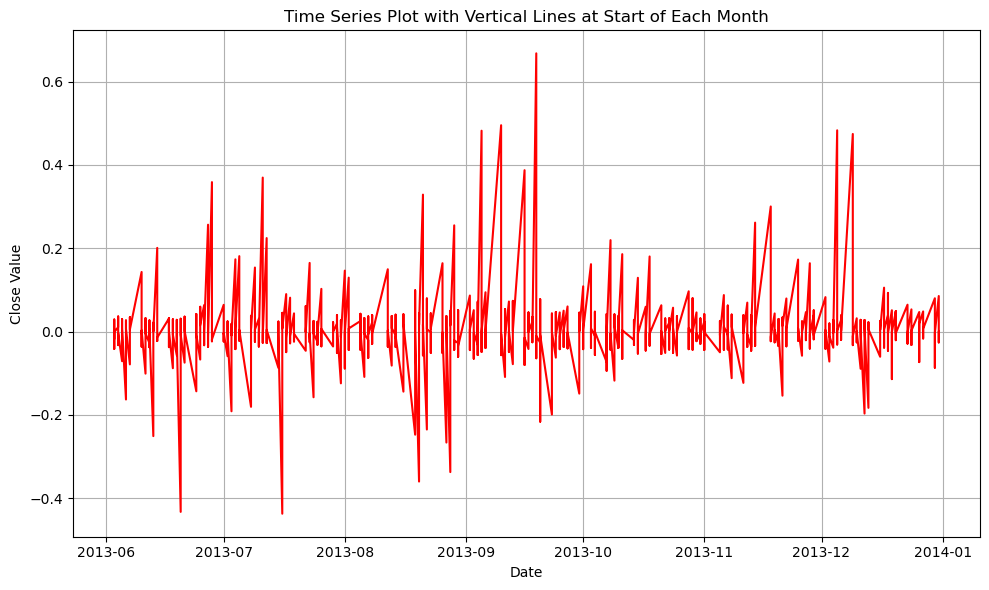

In [16]:
plot_series(Norm_Close)
# plt.axhline(0, linestyle='--', color='k', alpha=0.3)

In [ ]:
# we can see that we have to many of volatility in our data

## #Remove Increasing Volatility

In [17]:
monthly_volatility= Norm_Close.groupby(Norm_Close.index.month).std()

In [18]:
monthly_volatility

Date
6     0.012511
7     0.011845
8     0.016302
9     0.018096
10    0.011195
11    0.010942
12    0.011296
Name: Close, dtype: float64

In [19]:
close_monthly_vol= Norm_Close.index.map(lambda d: monthly_volatility.loc[d.month])

In [20]:
close_monthly_vol

Index([0.012510683455008817, 0.012510683455008817, 0.012510683455008817,
       0.012510683455008817, 0.012510683455008817, 0.012510683455008817,
       0.012510683455008817, 0.012510683455008817, 0.012510683455008817,
       0.012510683455008817,
       ...
       0.011295810932801692, 0.011295810932801692, 0.011295810932801692,
       0.011295810932801692, 0.011295810932801692, 0.011295810932801692,
       0.011295810932801692, 0.011295810932801692, 0.011295810932801692,
       0.011295810932801692],
      dtype='float64', name='Date', length=53921)

In [21]:
close_value= Norm_Close/ close_monthly_vol

In [23]:
close_value

Date
2013-06-03   -1.297934
2013-06-03    1.068887
2013-06-03    2.321012
2013-06-03    1.557521
2013-06-03   -0.442825
                ...   
2013-12-31    0.372066
2013-12-31   -0.219857
2013-12-31   -0.118385
2013-12-31   -0.236769
2013-12-31   -0.050736
Length: 53921, dtype: float64

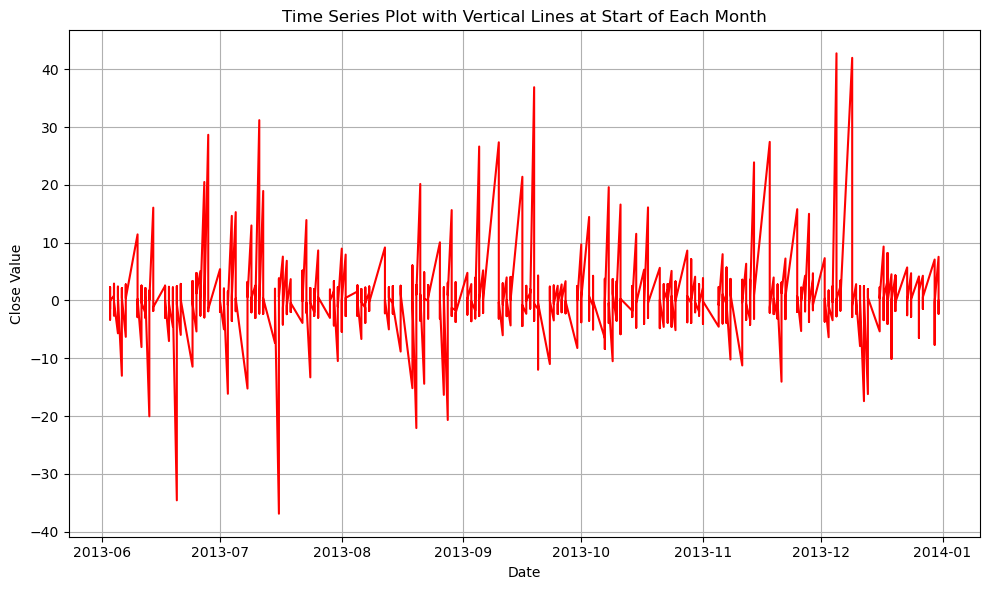

In [26]:
plot_series(close_value)

## # Remove Seasonality if any

In [27]:
monthly_avg= close_value.groupby(close_value.index.day).mean()

In [28]:
monthly_avg

Date
1     0.029308
2     0.003424
3    -0.026409
4     0.014816
5     0.018875
6    -0.007190
7    -0.018649
8    -0.013791
9     0.065055
10    0.017490
11    0.003403
12   -0.015027
13   -0.013353
14    0.050418
15   -0.009112
16   -0.056547
17   -0.000302
18    0.066874
19   -0.001678
20   -0.035825
21   -0.024902
22    0.015087
23   -0.006690
24   -0.028600
25   -0.002554
26   -0.011499
27   -0.004648
28    0.031455
29    0.046622
30   -0.011241
31    0.011838
dtype: float64

In [29]:
close_month_avg= close_value.index.map(lambda d: monthly_avg.loc[d.day])


In [30]:
close_value= close_value- close_month_avg

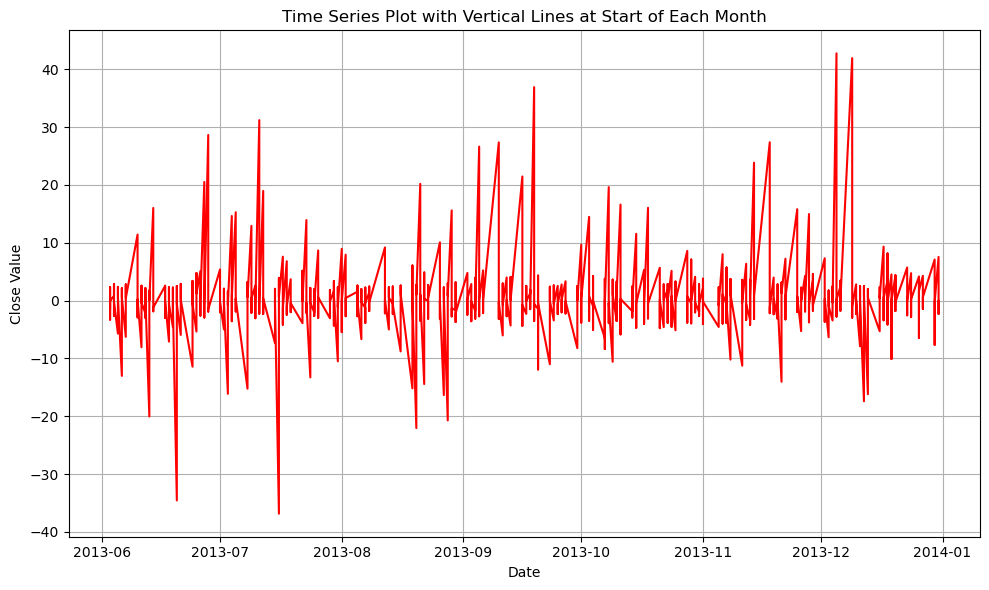

In [31]:
plot_series(close_value)

### ACF

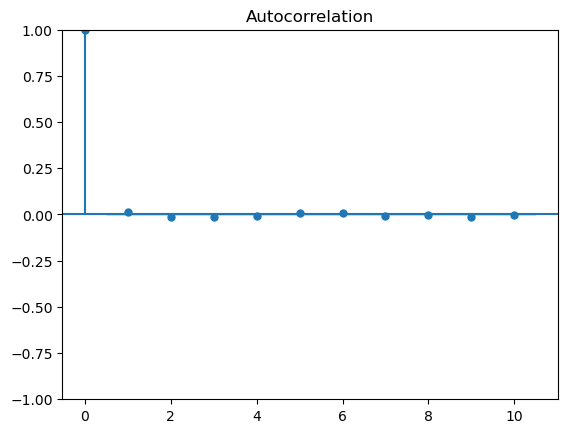

In [34]:
acf_plot= plot_acf(close_value, lags= 10)